In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np   
import seaborn as sns  
df = pd.read_csv('Archivos_higienizados/Higienizado_20230823.csv') 

C:\Users\alexa\AppData\Local\Temp\ipykernel_21928\3410157432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Calificacion'].fillna('NO CALIFICADO', inplace=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Intento                  1       2       3       4       5       6       7  \
Calificacion                                                                 
CONTACTO EFECTIVO   11.54%   6.77%   4.86%   3.75%   3.04%   3.91%   1.67%   

Intento                 8       9  
Calificacion                       
CONTACTO EFECTIVO   3.14%   2.72%  


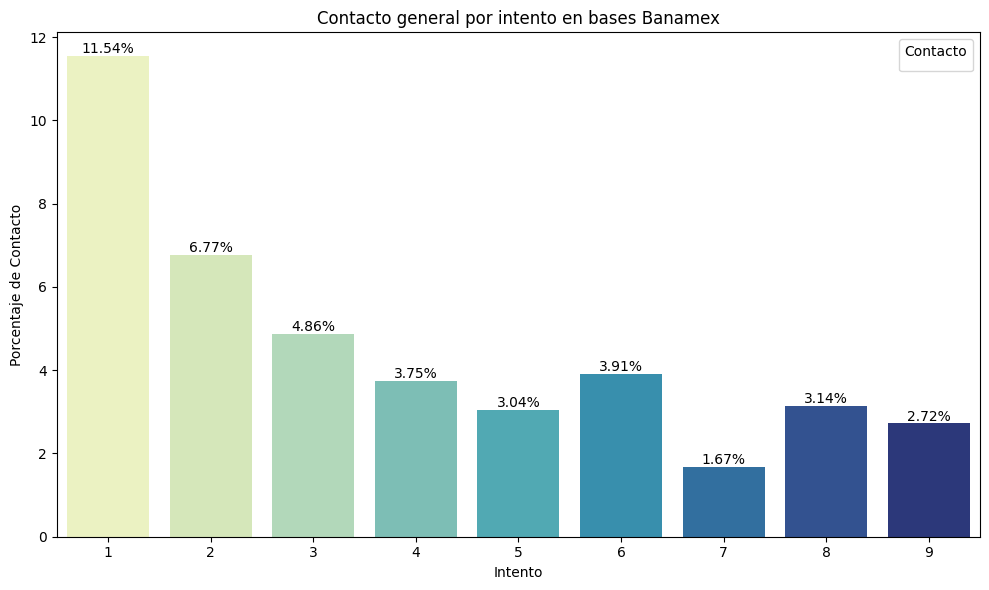

In [8]:
df_2 = df[df['Tipo_base']== 'S_BANAM']
df_2['Calificacion'].fillna('NO CALIFICADO', inplace=True)
contactO_efectivo= df_2[df_2['Calificacion']== 'CONTACTO EFECTIVO']
pivot_table_intentos = pd.pivot_table(df_2[df_2['Intento']!= 0], values='Connid', index='Calificacion', columns='Intento', aggfunc='count', fill_value=0, dropna=False)
total_llamadas_intento = pivot_table_intentos.sum(axis=0)
pivot_table_porcentajes = pd.pivot_table(contactO_efectivo, values='Connid', index='Calificacion', columns='Intento', aggfunc='count', fill_value=0)
porcentaje_intentos = (pivot_table_porcentajes/total_llamadas_intento)*100
porcents_filtred = porcentaje_intentos[porcentaje_intentos.index.get_level_values('Calificacion') != 'NO CALIFICADO']
por_format = porcents_filtred.applymap(lambda x: f'{x: .2f}%')
print(por_format)


# Crear una gráfica de barras usando Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=porcents_filtred, palette="YlGnBu")

# Agregar etiquetas de texto a las barras
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Configurar detalles de la gráfica
plt.title('Contacto general por intento en bases Banamex')
plt.xlabel('Intento')
plt.ylabel('Porcentaje de Contacto')
plt.xticks(rotation=0)
plt.legend(title='Contacto')

plt.tight_layout()
plt.show()

Intento             1        2        3        4        5        6        7  \
Tipificacion                                                                  
NO EFECTIVO    52.70%   71.79%   65.38%   36.84%   60.00%   52.63%   37.50%   
NO PAGO        37.84%   25.64%   23.08%   52.63%   33.33%   36.84%   62.50%   
PAGO            9.46%    2.56%   11.54%   10.53%    6.67%   10.53%    0.00%   

Intento             8        9  
Tipificacion                    
NO EFECTIVO    20.00%   23.08%  
NO PAGO        80.00%   76.92%  
PAGO            0.00%    0.00%  


Text(95.72222222222221, 0.5, 'Tipificacion')

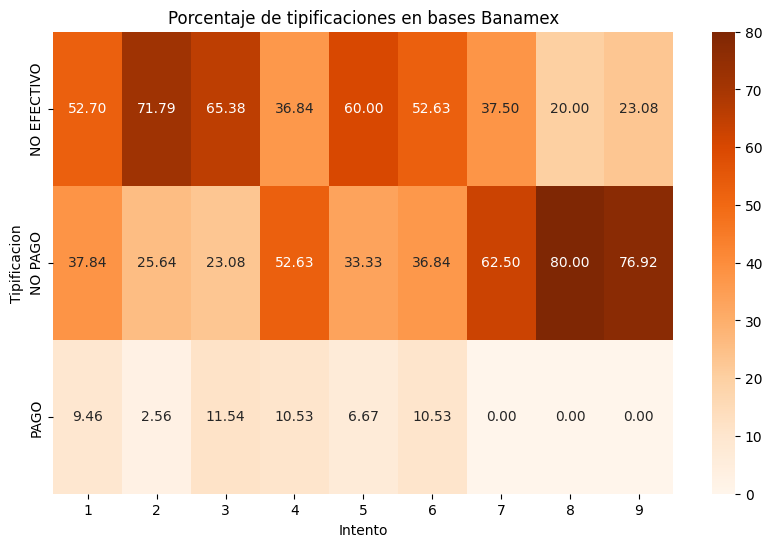

In [9]:
pivot_table_tipificaciones = pd.pivot_table(contactO_efectivo, values='Connid', index='Tipificacion', columns='Intento', aggfunc='count', fill_value=0 )
total_llamadas_intento_2 = pivot_table_tipificaciones.sum()
porcentaje_tipificaciones = (pivot_table_tipificaciones / total_llamadas_intento_2)*100
por_format_2 = porcentaje_tipificaciones.applymap(lambda x: f'{x: .2f}%')
print(por_format_2)
plt.figure(figsize=(10,6))
sns.heatmap(porcentaje_tipificaciones, annot=True, fmt=".2f", cmap="Oranges")
plt.title('Porcentaje de tipificaciones en bases Banamex')
plt.xlabel('Intento')
plt.ylabel('Tipificacion')

Intento                  1        2        3        4        5        6  \
SubTipificacion                                                           
CONTESTA Y CUELGA   76.92%   85.71%   76.47%   85.71%   55.56%   80.00%   
FALLECIDO            0.00%    0.00%    0.00%    0.00%   11.11%    0.00%   
ILOCALIZABLE         0.00%    0.00%   17.65%    0.00%    0.00%    0.00%   
NUMERO EQUIVOCADO   23.08%   14.29%    5.88%   14.29%   33.33%   20.00%   

Intento                  7         8        9  
SubTipificacion                                
CONTESTA Y CUELGA   33.33%   100.00%   66.67%  
FALLECIDO            0.00%     0.00%    0.00%  
ILOCALIZABLE         0.00%     0.00%    0.00%  
NUMERO EQUIVOCADO   66.67%     0.00%   33.33%  


Text(50.7222222222222, 0.5, 'Subtipificacion')

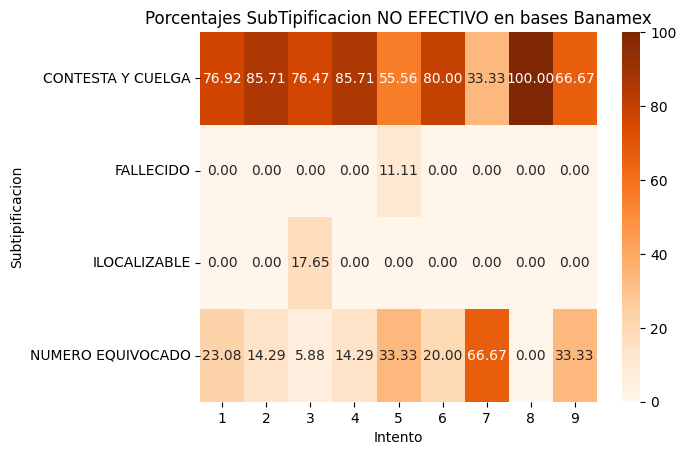

In [10]:
no_efectivo = df_2[df_2['Tipificacion']== 'NO EFECTIVO']
pivot_table_subtipificaciones = pd.pivot_table(no_efectivo, values='Connid', index='SubTipificacion', columns='Intento', aggfunc='count', fill_value=0)
total_llamadas_intento_3 = pivot_table_subtipificaciones.sum()
porcen_subtipificaciones = (pivot_table_subtipificaciones/total_llamadas_intento_3)*100
por_format_3 = porcen_subtipificaciones.applymap(lambda x: f'{x: .2f}%')
print(por_format_3)
plt.title('Porcentajes SubTipificacion NO EFECTIVO en bases Banamex')
sns.heatmap(porcen_subtipificaciones, annot=True, fmt=".2f", cmap='Oranges')
plt.xlabel('Intento')
plt.ylabel('Subtipificacion')

Intento                                                   1        2        3  \
SubTipificacion                                                                 
ASEGURADO INDICA NO TENER DINERO                      0.00%    0.00%    0.00%   
ASEGURADO NO DESEA SEGUIR CON LA PÓLIZA               0.00%   20.00%    0.00%   
ASEGURADO NO QUISO PROPORCIONAR CANDADOS DE SEG...   10.71%    0.00%    0.00%   
ASEGURADO SOLICITA HABLAR PRIMERO CON SU AGENTE      28.57%   40.00%   50.00%   
ASEGURADO SOLICITA QUE LE LLAMEMOS DESPUÉS           46.43%   30.00%   50.00%   
LA PERSONA QUE CONTESTA NO DESEA QUE LE VUELVAN...    0.00%    0.00%    0.00%   
POLIZA YA PAGADA AL MOMENTO DE LA LLAMADA            14.29%   10.00%    0.00%   
PÓLIZA CANCELADA POR TITULAR                          0.00%    0.00%    0.00%   

Intento                                                   4        5        6  \
SubTipificacion                                                                 
ASEGURADO INDICA NO TENER D

Text(50.22222222222219, 0.5, 'Subtipificacion')

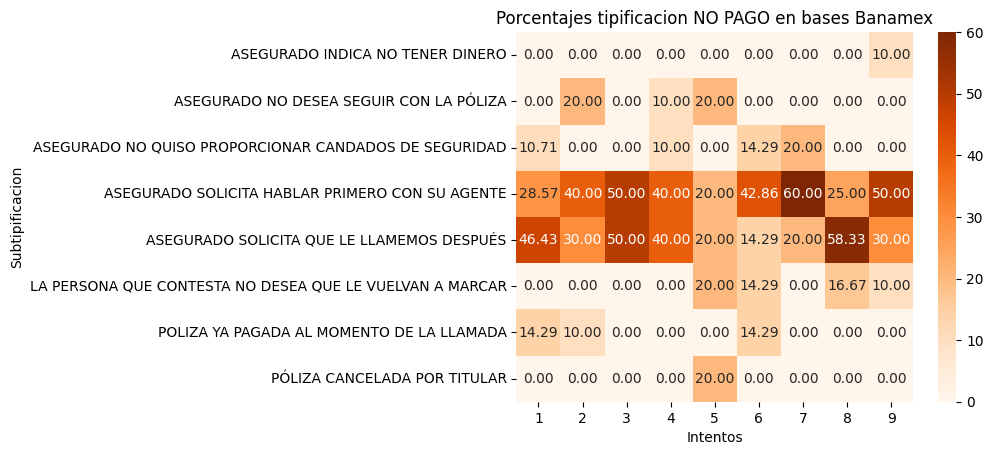

In [11]:
no_pago = df_2[df_2['Tipificacion']== 'NO PAGO']
pivot_table_subtipificaciones_1 = pd.pivot_table(no_pago, values='Connid', index='SubTipificacion', columns='Intento', aggfunc='count', fill_value=0)
total_llamadas_intento_4 = pivot_table_subtipificaciones_1.sum()
porcen_subtipificaciones_1 = (pivot_table_subtipificaciones_1/total_llamadas_intento_4)*100
por_format_4 = porcen_subtipificaciones_1.applymap(lambda x: f'{x: .2f}%')
print(por_format_4)
plt.title('Porcentajes tipificacion NO PAGO en bases Banamex')
sns.heatmap(porcen_subtipificaciones_1, annot=True, fmt=".2f", cmap='Oranges')
plt.xlabel('Intentos')
plt.ylabel('Subtipificacion')

Intento                                   1         2        3        4  \
SubTipificacion                                                           
CAMBIO DE CONDUCTO                    0.00%     0.00%   33.33%    0.00%   
COBRO EFECTIVO POR IVR                0.00%   100.00%    0.00%    0.00%   
PROMESA DE PAGO EN BANCO             57.14%     0.00%   33.33%   50.00%   
PROMESA DE PAGO POR PORTAL METLIFE   42.86%     0.00%   33.33%   50.00%   

Intento                                    5         6  
SubTipificacion                                         
CAMBIO DE CONDUCTO                     0.00%     0.00%  
COBRO EFECTIVO POR IVR                 0.00%     0.00%  
PROMESA DE PAGO EN BANCO             100.00%   100.00%  
PROMESA DE PAGO POR PORTAL METLIFE     0.00%     0.00%  


Text(50.7222222222222, 0.5, 'Subtipificacion')

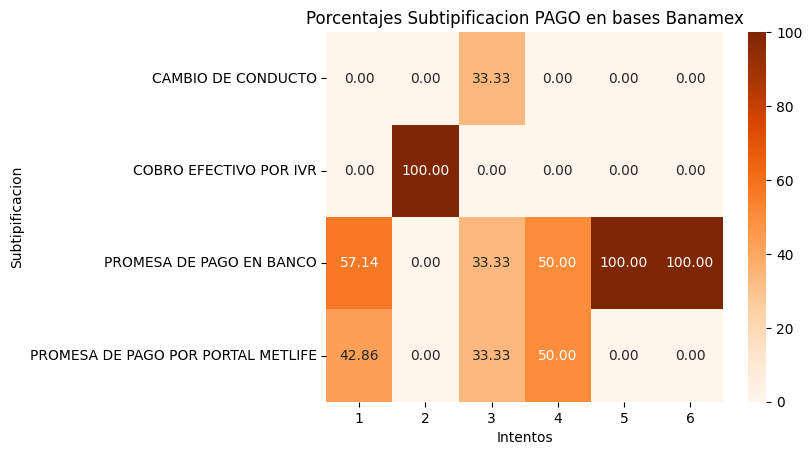

In [12]:
pago = df_2[df_2['Tipificacion']== 'PAGO']
pivot_table_subtipificaciones_2 = pd.pivot_table(pago, values='Connid', index='SubTipificacion', columns='Intento', aggfunc='count', fill_value=0)
total_llamadas_intento_5 = pivot_table_subtipificaciones_2.sum()
porcen_subtipificaciones_2 = (pivot_table_subtipificaciones_2/total_llamadas_intento_5)*100
por_format_5 = porcen_subtipificaciones_2.applymap(lambda x: f'{x: .2f}%')
print(por_format_5)
plt.title('Porcentajes Subtipificacion PAGO en bases Banamex')
sns.heatmap(porcen_subtipificaciones_2, annot=True, fmt='.2f', cmap='Oranges')
plt.xlabel('Intentos')
plt.ylabel('Subtipificacion')